## Importing Packages

In [1]:
import sys
sys.path.append("..")
sys.path.append("../src")
sys.path.append("../database")

In [2]:
import pandas as pd
import numpy as np
#import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = 999

import warnings

warnings.filterwarnings('ignore')

# # Plotting
# import plotly
# import plotly.graph_objs as go
# # import plotly.io as pio
# #import cufflinks as cf
# plotly.offline.init_notebook_mode(connected=True)


## Importing Data

In [4]:
caracFisicas = pd.read_excel("../database/input/dados.xls",sheet_name="Resultados")
caracFisicas = caracFisicas.drop(["SAT","PES","Nash","Nash Ver"],axis=1)
caracFisicas = caracFisicas.set_index('Estações ANA')

db = pd.ExcelFile("../database/input/dados.xls")
basins = db.sheet_names[6:]

In [5]:
def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

In [6]:
acdf = pd.DataFrame(columns=[f"{i} meses" for i in range(13)])

In [7]:
for basin in basins:
    basin_series = db.parse(basin)
    basin_valid_series = basin_series.query("Q!=-999").reset_index()

    delta_valid_months = basin_valid_series.Data.dt.to_period('M').astype(int) - basin_valid_series.Data.shift().dt.to_period('M').astype(int)
    idx = np.array(delta_valid_months[delta_valid_months != 1].keys())


    contseq = (idx[1:] - idx[:-1])
    maxcontseq = contseq.max()
    contseqidx = contseq.argmax()

    Q = basin_valid_series.iloc[idx[contseqidx]:idx[contseqidx]+maxcontseq]["Q"].values
    acdf.loc[basin] = acf(Q,13)
acdf.index = acdf.index.astype('int64')

In [8]:
models_results = pd.read_excel("../database/Table_2.xlsx",sheet_name="Planilha1",skiprows=2)
models_results_columns = ["Basin","n_obs","FFNN-1","FFNN-2","FFNN-3","LSTM-rg","SMAP","LSTM-ic","FFNN-ic"]
models_results.columns = models_results_columns
models_results = models_results.set_index("Basin")


In [9]:
results_and_acf = pd.merge(models_results, acdf, left_index=True, right_index=True)
results_and_acf

,n_obs,FFNN-1,FFNN-2,FFNN-3,LSTM-rg,SMAP,LSTM-ic,FFNN-ic,0 meses,1 meses,2 meses,3 meses,4 meses,5 meses,6 meses,7 meses,8 meses,9 meses,10 meses,11 meses,12 meses
Basin,,,,,,,,,,,,,,,,,,,,,
34730000,475.0,-6.702,-5.586,-4.673,-10.584,NaN,0.289,0.090,1.0,0.831477,0.595636,0.352141,0.145829,0.019340,-0.035206,-0.041223,-0.003072,0.048936,0.125754,0.221906,0.203624
34740000,92.0,0.207,0.309,0.452,0.416,NaN,0.231,-0.317,1.0,0.488676,-0.082017,-0.255065,-0.351202,-0.403163,-0.395386,-0.310479,-0.021642,0.623519,0.908690,0.616407,0.080629
34750000,514.0,0.897,0.890,0.881,0.770,0.810,0.624,0.595,1.0,0.552545,0.177711,-0.002615,-0.067966,-0.086144,-0.090352,-0.086736,-0.073117,-0.034824,0.096976,0.296728,0.382389
35050000,115.0,0.565,0.666,0.467,0.784,0.390,0.480,0.564,1.0,0.459623,-0.004464,-0.137835,-0.242466,-0.241182,-0.270875,-0.305470,-0.280034,-0.106120,0.393608,0.634908,0.261290
35125000,328.0,0.787,0.840,0.845,0.833,0.884,0.811,0.799,1.0,0.482220,0.063026,-0.099069,-0.147308,-0.162090,-0.162606,-0.158082,-0.140449,-0.103713,0.016042,0.331573,0.593859
35170000,462.0,0.898,0.880,0.847,0.870,0.901,0.852,0.935,1.0,0.684423,0.266157,0.003178,-0.112110,-0.148060,-0.158459,-0.151865,-0.121314,-0.030107,0.178809,0.514418,0.630027
35210000,578.0,0.765,0.902,0.882,0.847,0.781,0.884,0.914,1.0,0.647881,0.205336,-0.016533,-0.068187,-0.076245,-0.078012,-0.077789,-0.074053,-0.049267,0.091842,0.386704,0.538586
35223000,130.0,0.212,0.255,0.116,0.141,NaN,0.004,0.081,1.0,-0.000269,-0.074163,-0.122667,-0.130675,-0.138420,-0.115857,-0.123159,-0.128290,-0.143707,-0.153288,-0.171824,0.996129
35240000,421.0,0.690,0.735,0.551,0.622,NaN,0.376,0.535,1.0,0.444362,0.029095,-0.091783,-0.102269,-0.104979,-0.105755,-0.103195,-0.098503,-0.008273,0.093910,0.154891,0.302751


In [10]:
models_labels = models_results.columns[1:]

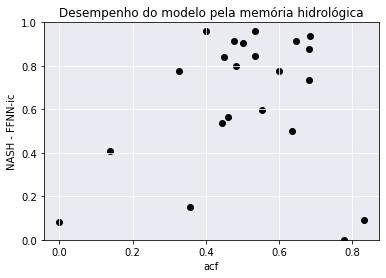

<Figure size 432x288 with 0 Axes>

In [11]:
model = models_labels[-1]
plt.scatter(results_and_acf["1 meses"],results_and_acf[model],facecolor='#000')
plt.xlabel("acf")
plt.ylabel("NASH - %s"% model)
#plt.xlim(-2, 2)
plt.ylim(0, 1)
plt.grid(c='#fff')
ax = plt.axes()
ax.set_facecolor('#eaeaf2')
plt.title("Desempenho do modelo pela memória hidrológica")
fig1 = plt.figure()

In [12]:
results_and_acf[~models_results.SMAP.isna()][model]

Basin
34750000     0.595
35050000     0.564
35125000     0.799
35170000     0.935
35210000     0.914
35260000     0.775
35263000     0.876
35880000    -0.001
35950000     0.842
36020000     0.410
36125000     0.501
36130000     0.843
36160000     0.776
36210000     0.735
36250000     0.914
36270000   -32.950
36290000     0.958
36520000     0.903
Name: FFNN-ic, dtype: float64

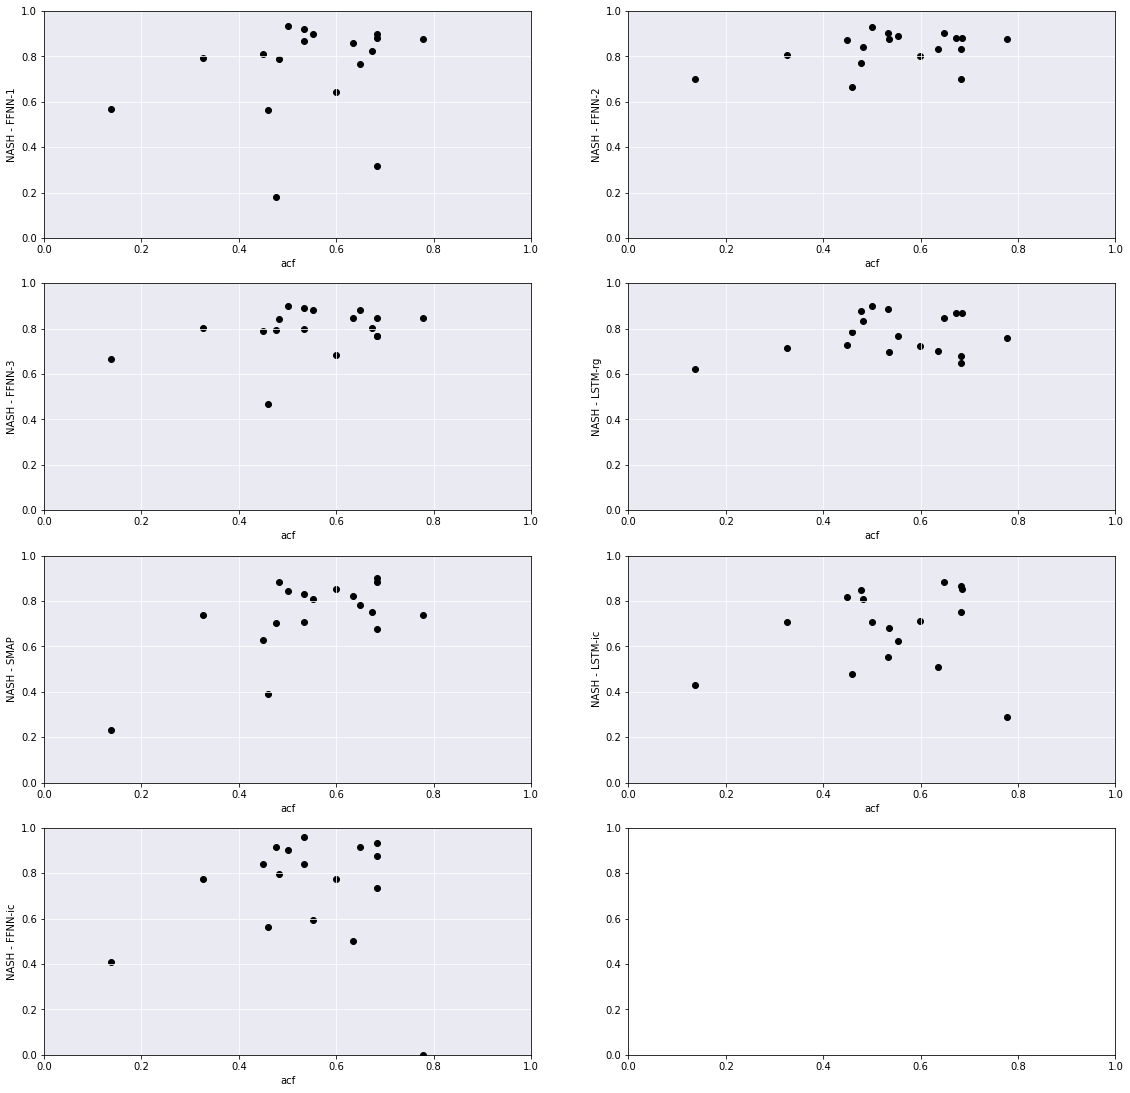

In [13]:
fig, axs = plt.subplots(4, 2,figsize=(19.2, 19.2))
#grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.5)

i,j = 0,0
for model in models_labels:
    axs[j,i].scatter(results_and_acf[~models_results.SMAP.isna()]["1 meses"],results_and_acf[~models_results.SMAP.isna()][model],c='#000')
    axs[j,i].set_xlabel("acf")
    axs[j,i].set_ylabel("NASH - %s"% model)
    axs[j,i].set_xlim([0, 1])
    axs[j,i].set_ylim([0, 1])
    axs[j,i].grid(c='#fff')
    axs[j,i].set_facecolor('#eaeaf2')
    #axs[j,i].patch.set_alpha(0.8)
    
    i+=1
    if i == 2:
        i=0
        j+=1
fig.show()

In [14]:
fig.savefig('../database/output/images/modelos_por_acf.png')

In [15]:
models_results.index.difference([34730000, 34740000,35668000, 36220000])

Int64Index([34750000, 35050000, 35125000, 35170000, 35210000, 35223000,
            35240000, 35260000, 35263000, 35880000, 35950000, 36020000,
            36125000, 36130000, 36160000, 36210000, 36250000, 36270000,
            36290000, 36470000, 36520000],
           dtype='int64', name='Basin')

In [16]:
relu = lambda x: max(x,0)
models_results[models_results.index != 36220000].agg({model: relu for model in models_labels}).mean()

FFNN-1     0.632208
FFNN-2     0.716375
FFNN-3     0.660708
LSTM-rg    0.647167
SMAP       0.732000
LSTM-ic    0.547333
FFNN-ic    0.583667
dtype: float64

In [17]:
models_results.loc[models_results.index.difference([34730000, 34740000,35668000, 36220000])]\
                    .agg({model: relu for model in models_labels}).mean()

FFNN-1     0.712667
FFNN-2     0.793714
FFNN-3     0.733571
LSTM-rg    0.719810
SMAP       0.732000
LSTM-ic    0.599095
FFNN-ic    0.662762
dtype: float64

In [18]:
models_results[~models_results.SMAP.isna()].agg({model: relu for model in models_labels}).mean()

FFNN-1     0.743667
FFNN-2     0.831611
FFNN-3     0.793389
LSTM-rg    0.773167
SMAP       0.732000
LSTM-ic    0.640278
FFNN-ic    0.685556
dtype: float64

In [19]:
model_cor_acf = lambda x: np.corrcoef([results_and_acf[~models_results.SMAP.isna()]["1 meses"],x])[0,1]
                                       
models_results[~models_results.SMAP.isna()].agg({model: model_cor_acf for model in models_labels})

FFNN-1     0.226910
FFNN-2     0.404304
FFNN-3     0.340419
LSTM-rg    0.219992
SMAP       0.647859
LSTM-ic   -0.181301
FFNN-ic   -0.210230
dtype: float64

In [20]:
models_results.index

Int64Index([34730000, 34740000, 34750000, 35050000, 35125000, 35170000,
            35210000, 35223000, 35240000, 35260000, 35263000, 35668000,
            35880000, 35950000, 36020000, 36125000, 36130000, 36160000,
            36210000, 36220000, 36250000, 36270000, 36290000, 36470000,
            36520000],
           dtype='int64', name='Basin')

In [21]:
def log_nash(model1,model2):
#     model1 = model1_.values
#     model2 = model2_.values
    assert len(model1) == len(model2)
    models_div = pd.Series(np.zeros(len(model1)),index=model1.index)
    
    for i in models_div.index:
        if model1[i] < 0 and model2[i] < 0:
            models_div[i] = 0
        elif model1[i] > 0 and model2[i] < 0:
            models_div[i] = -1
        elif model1[i] < 0 and model2[i] > 0:
            models_div[i] = 1
        else:
            models_div[i] = np.log10(model2[i]/model1[i])
    return models_div


### Visualizações
#### Regionalização X *-ic* por numero de observações 

In [22]:
tfont = {'fontname':'Times New Roman'}


Text(0.5, 1.0, 'Comparação dos modelos FFNN-2 e LSTM-ic')

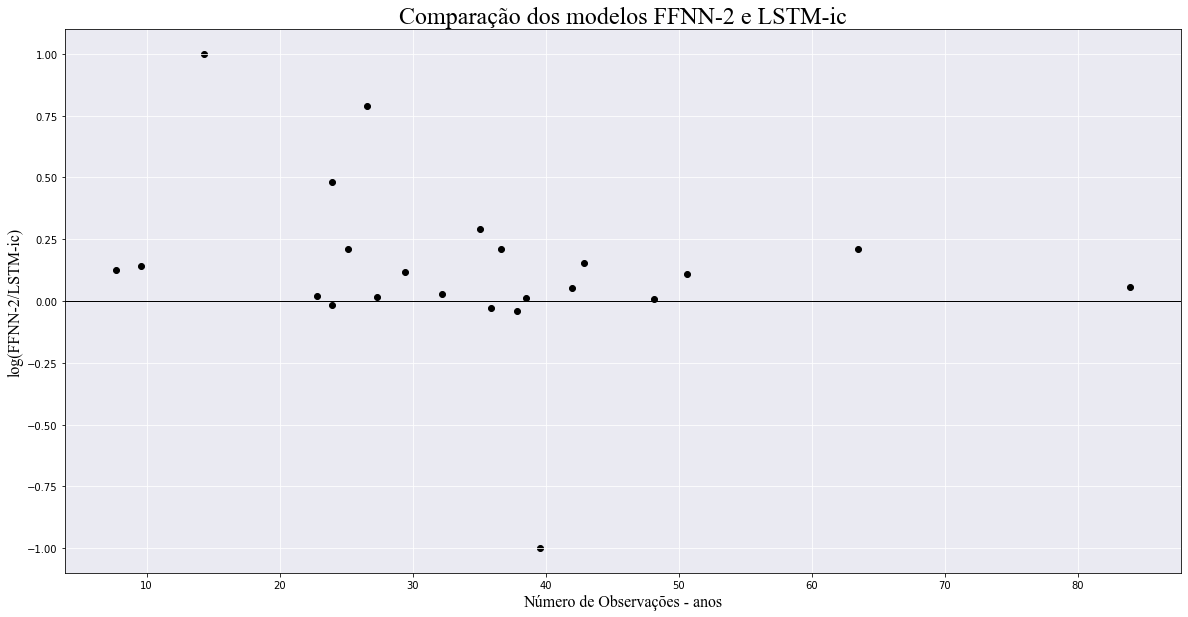

In [23]:
id_down = -2
id_up = 1
log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
model = models_labels[-1]
fig1 = plt.figure(figsize=(20,10))

plt.scatter(results_and_acf["n_obs"]/12,log_FFNN2_LSTMrg,facecolor='#000')
plt.xlabel("Número de Observações - anos",fontsize=16,**tfont)
plt.ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]),fontsize=16,**tfont)
abs_ = max(abs(log_FFNN2_LSTMrg[~models_results.SMAP.isna()]))
#plt.xlim(-2, 2)
plt.ylim(-(abs_+0.1), abs_+0.1)
plt.axhline(linewidth=1, color='#000')
plt.grid(c='#fff')
ax = plt.axes()
ax.set_facecolor('#eaeaf2')
plt.title("Comparação dos modelos %s e %s" % (models_labels[id_up],models_labels[id_down]),fontsize=24,**tfont)
#fig1.savefig('../database/output/images/log_%s_%s.png'%(models_labels[id_up],models_labels[id_down]))

In [24]:
models_labels_id = {i: models_labels[i] for i in range(len(models_labels))}
models_labels_id

{0: 'FFNN-1',
 1: 'FFNN-2',
 2: 'FFNN-3',
 3: 'LSTM-rg',
 4: 'SMAP',
 5: 'LSTM-ic',
 6: 'FFNN-ic'}

In [25]:
pairs = [(-1,-2),(3,1),(3,2),(4,1),(4,2),(-1,1)]

In [26]:
"Número de Observações - anos"
"Comparação dos modelos %s e %s"
"Estação ANA"
'Comparação dos modelos regionais por bacia'


"Number of observations - years"
"Comparison of models %s and %s"
"ANA's Station"
"Comparison of regional models per basin"

'Comparison of regional models per basin'

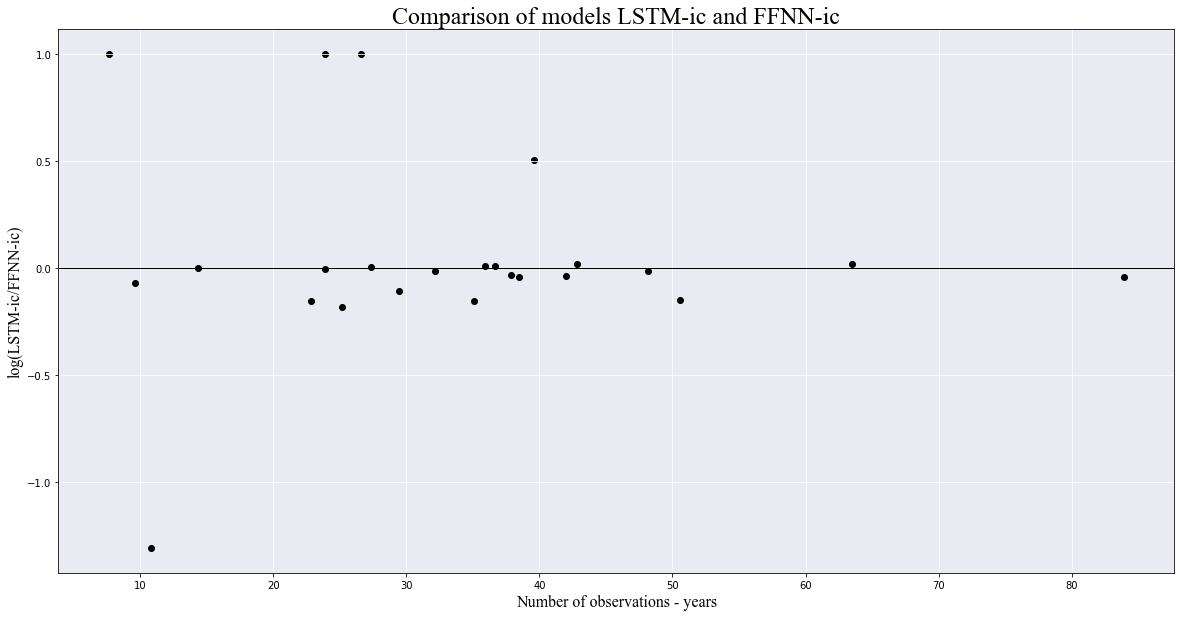

In [27]:
(id_down,id_up) = pairs[0]
log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
model = models_labels[-1]
fig1 = plt.figure(figsize=(20,10))

plt.scatter(results_and_acf["n_obs"]/12,log_FFNN2_LSTMrg,facecolor='#000')
plt.xlabel("Number of observations - years",fontsize=16,**tfont)
plt.ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]),fontsize=16,**tfont)
plt.axhline(linewidth=1, color='#000')
#plt.xlim(-2, 2)
plt.ylim(None, None)
plt.grid(c='#fff')
ax = plt.axes()
ax.set_facecolor('#eaeaf2')
plt.title("Comparison of models %s and %s" % (models_labels[id_up],models_labels[id_down]),fontsize=24,**tfont)
fig1.savefig('../database/output/images/log_%s_%s.png'%(models_labels[id_up],models_labels[id_down]))


# for (id_down,id_up) in pairs:
#     log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
#     model = models_labels[-1]
#     fig1 = plt.figure(figsize=(20,10))

#     plt.scatter(results_and_acf["n_obs"]/12,log_FFNN2_LSTMrg,facecolor='#000')
#     plt.xlabel("Número de observações - anos",fontsize=16,**tfont)
#     plt.ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]),fontsize=16,**tfont)
#     plt.axhline(linewidth=1, color='#000')
#     #plt.xlim(-2, 2)
#     plt.ylim(None, None)
#     plt.grid(c='#fff')
#     ax = plt.axes()
#     ax.set_facecolor('#eaeaf2')
#     plt.title("Comparação dos modelos %s e %s" % (models_labels[id_up],models_labels[id_down]),fontsize=24,**tfont)
#     fig1.savefig('../database/output/images/log_%s_%s.png'%(models_labels[id_up],models_labels[id_down]))

In [28]:
caracFisicas.merge(results_and_acf, left_index=True, right_index=True)

,Declividade - D (%),Precipitação média - P (mm),Comprimento do rio principal - CT (km),Área de contribuição da estação fluviométrica - A (km2),Perímetro da área de contribuição da estação fluviométrica - P (km),Comprimento total de drenagem - CTD (km),Densidade de drenagem - DD (km-1),Capacidade de armazenamento do solo CAD (mm),Curve number médio – CN (mm),Índice de compacidade da bacia - Kc,Parcela da bacia no cristalino - Cr,n_obs,FFNN-1,FFNN-2,FFNN-3,LSTM-rg,SMAP,LSTM-ic,FFNN-ic,0 meses,1 meses,2 meses,3 meses,4 meses,5 meses,6 meses,7 meses,8 meses,9 meses,10 meses,11 meses,12 meses
Estações ANA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34730000,0.069435,1128.320909,64319.016213,897.371509,211.282396,528.790311,0.589266,59.483342,56.773914,1.989630,0.000000,475.0,-6.702,-5.586,-4.673,-10.584,NaN,0.289,0.090,1.0,0.831477,0.595636,0.352141,0.145829,0.019340,-0.035206,-0.041223,-0.003072,0.048936,0.125754,0.221906,0.203624
34740000,0.064875,535.260952,108123.318373,2221.988771,181.354250,356.001008,0.160217,51.100000,59.941362,1.085305,0.000014,92.0,0.207,0.309,0.452,0.416,NaN,0.231,-0.317,1.0,0.488676,-0.082017,-0.255065,-0.351202,-0.403163,-0.395386,-0.310479,-0.021642,0.623519,0.908690,0.616407,0.080629
34750000,0.056337,741.250000,328854.100000,19185.920000,1256.998009,10051.126447,0.523880,73.314737,73.945379,2.559990,0.588056,514.0,0.897,0.890,0.881,0.770,0.810,0.624,0.595,1.0,0.552545,0.177711,-0.002615,-0.067966,-0.086144,-0.090352,-0.086736,-0.073117,-0.034824,0.096976,0.296728,0.382389
35050000,0.092084,970.505091,66700.567865,997.264362,218.297537,606.451358,0.608115,71.460816,82.375460,1.950019,0.534352,115.0,0.565,0.666,0.467,0.784,0.390,0.480,0.564,1.0,0.459623,-0.004464,-0.137835,-0.242466,-0.241182,-0.270875,-0.305470,-0.280034,-0.106120,0.393608,0.634908,0.261290
35125000,0.081096,1121.240000,96187.532702,1501.236654,261.225198,1501.190430,0.999969,65.376568,84.314697,1.901891,0.920865,328.0,0.787,0.840,0.845,0.833,0.884,0.811,0.799,1.0,0.482220,0.063026,-0.099069,-0.147308,-0.162090,-0.162606,-0.158082,-0.140449,-0.103713,0.016042,0.331573,0.593859
35170000,0.081491,1168.190808,171568.577216,3967.244061,495.001246,3523.079598,0.888042,69.009463,79.753098,2.216955,0.769608,462.0,0.898,0.880,0.847,0.870,0.901,0.852,0.935,1.0,0.684423,0.266157,0.003178,-0.112110,-0.148060,-0.158459,-0.151865,-0.121314,-0.030107,0.178809,0.514418,0.630027
35210000,0.071414,771.921798,152257.119418,1566.680439,388.941592,1574.682660,1.005108,74.983870,82.766658,2.771975,0.956835,578.0,0.765,0.902,0.882,0.847,0.781,0.884,0.914,1.0,0.647881,0.205336,-0.016533,-0.068187,-0.076245,-0.078012,-0.077789,-0.074053,-0.049267,0.091842,0.386704,0.538586
35223000,0.082172,930.997041,53743.470494,693.135050,203.266705,636.738076,0.918635,82.157102,84.314224,2.177972,0.762906,130.0,0.212,0.255,0.116,0.141,NaN,0.004,0.081,1.0,-0.000269,-0.074163,-0.122667,-0.130675,-0.138420,-0.115857,-0.123159,-0.128290,-0.143707,-0.153288,-0.171824,0.996129
35240000,0.099887,718.262653,124646.235375,1532.777055,342.411666,1309.705546,0.854466,66.220487,85.743443,2.467199,0.913016,421.0,0.690,0.735,0.551,0.622,NaN,0.376,0.535,1.0,0.444362,0.029095,-0.091783,-0.102269,-0.104979,-0.105755,-0.103195,-0.098503,-0.008273,0.093910,0.154891,0.302751


#### Dicionários de suporte às plotagens dos modelos

In [29]:
models_labels_id

{0: 'FFNN-1',
 1: 'FFNN-2',
 2: 'FFNN-3',
 3: 'LSTM-rg',
 4: 'SMAP',
 5: 'LSTM-ic',
 6: 'FFNN-ic'}

In [30]:
{i: caracFisicas.columns[i] for i in range(len(caracFisicas.columns))}

{0: 'Declividade - D (%)',
 1: 'Precipitação média - P (mm)',
 2: 'Comprimento do rio principal - CT (km)',
 3: 'Área de contribuição da estação fluviométrica - A (km2)',
 4: 'Perímetro da área de contribuição da estação fluviométrica - P (km)',
 5: 'Comprimento total de drenagem - CTD (km)',
 6: 'Densidade de drenagem - DD (km-1)',
 7: 'Capacidade de armazenamento do solo CAD (mm)',
 8: 'Curve number médio – CN (mm)',
 9: 'Índice de compacidade da bacia - Kc',
 10: 'Parcela da bacia no cristalino - Cr'}

In [31]:
models_results[models_labels[id_up]]#[~models_results.SMAP.isna()]

#caracFisicas[~models_results.SMAP.isna()][id_carac]

Basin
34730000    0.289
34740000    0.231
34750000    0.624
35050000    0.480
35125000    0.811
35170000    0.852
35210000    0.884
35223000    0.004
35240000    0.376
35260000    0.712
35263000    0.866
35668000    0.035
35880000    0.289
35950000    0.819
36020000    0.430
36125000    0.511
36130000    0.554
36160000    0.706
36210000    0.752
36220000    0.312
36250000    0.850
36270000   -3.084
36290000    0.679
36470000    0.676
36520000    0.706
Name: LSTM-ic, dtype: float64

Text(0.5, 1.0, 'FFNN-3')

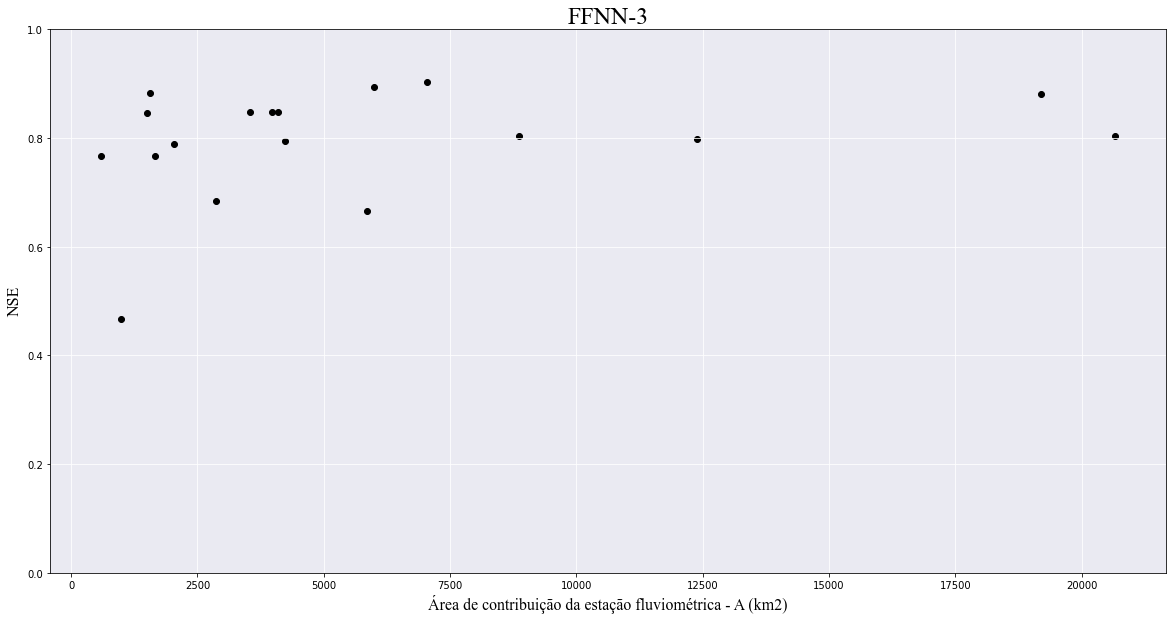

In [32]:
id_down = 4
id_up = 2
id_carac = caracFisicas.columns[3]
model = models_labels[-1]
fig2 = plt.figure(figsize=(20,10))

#plt.scatter(results_and_acf[~models_results.SMAP.isna()]["1 meses"],log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
#plt.xlabel("acf")
plt.scatter(caracFisicas[id_carac][~models_results.SMAP.isna()],models_results[models_labels[id_up]][~models_results.SMAP.isna()],facecolor='#000')
plt.axhline(linewidth=1, color='#000')
plt.xlabel(id_carac,fontsize=16,**tfont)
plt.ylabel("NSE",fontsize=16,**tfont)
#plt.xlim(-2, 2)
plt.ylim(0, 1)
plt.grid(c='#fff')
ax = plt.axes()
ax.set_facecolor('#eaeaf2')
plt.title("%s" % (models_labels[id_up]),fontsize=24,**tfont)
#fig1.savefig('../database/output/%s_%s.png'%(models_labels[id_up],models_labels[id_down]))

Text(0.5, 1.0, 'Comparação dos Modelos FFNN-3 e SMAP')

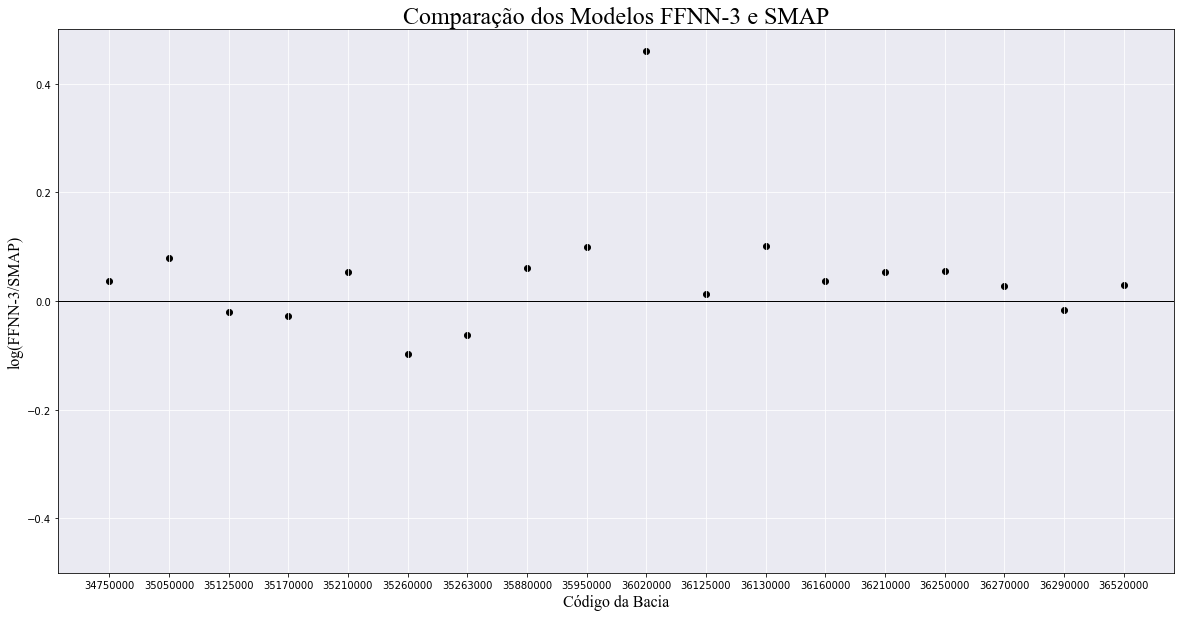

In [33]:
id_down = 4
id_up = 2
id_carac = caracFisicas.columns[10]
log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
model = models_labels[-1]
fig2 = plt.figure(figsize=(20,10))

#plt.scatter(results_and_acf[~models_results.SMAP.isna()]["1 meses"],log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
#plt.xlabel("acf")
plt.scatter(caracFisicas[~models_results.SMAP.isna()].index.astype(str),log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
plt.axhline(linewidth=1, color='#000')
plt.xlabel("Código da Bacia",fontsize=16,**tfont)
plt.ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]),fontsize=16,**tfont)
#plt.xlim(-2, 2)
plt.ylim(-0.5, 0.5)
plt.grid(c='#fff')
ax = plt.axes()
ax.set_facecolor('#eaeaf2')
plt.title("Comparação dos Modelos %s e %s" % (models_labels[id_up],models_labels[id_down]),fontsize=24,**tfont)
#fig1.savefig('../database/output/%s_%s.png'%(models_labels[id_up],models_labels[id_down]))

In [34]:
pairs = [(-1,-2),(3,1),(3,2),(4,1),(4,2),(-1,1)]
pairs[1:-1]

[(3, 1), (3, 2), (4, 1), (4, 2)]

In [35]:
models_results[~models_results.SMAP.isna()]

,n_obs,FFNN-1,FFNN-2,FFNN-3,LSTM-rg,SMAP,LSTM-ic,FFNN-ic
Basin,,,,,,,,
34750000,514.0,0.897,0.890,0.881,0.770,0.810,0.624,0.595
35050000,115.0,0.565,0.666,0.467,0.784,0.390,0.480,0.564
35125000,328.0,0.787,0.840,0.845,0.833,0.884,0.811,0.799
35170000,462.0,0.898,0.880,0.847,0.870,0.901,0.852,0.935
35210000,578.0,0.765,0.902,0.882,0.847,0.781,0.884,0.914
35260000,504.0,0.643,0.804,0.684,0.726,0.855,0.712,0.775
35263000,287.0,0.881,0.833,0.766,0.648,0.885,0.866,0.876
35880000,287.0,0.875,0.879,0.847,0.758,0.737,0.289,-0.001
35950000,386.0,0.809,0.874,0.789,0.730,0.628,0.819,0.842


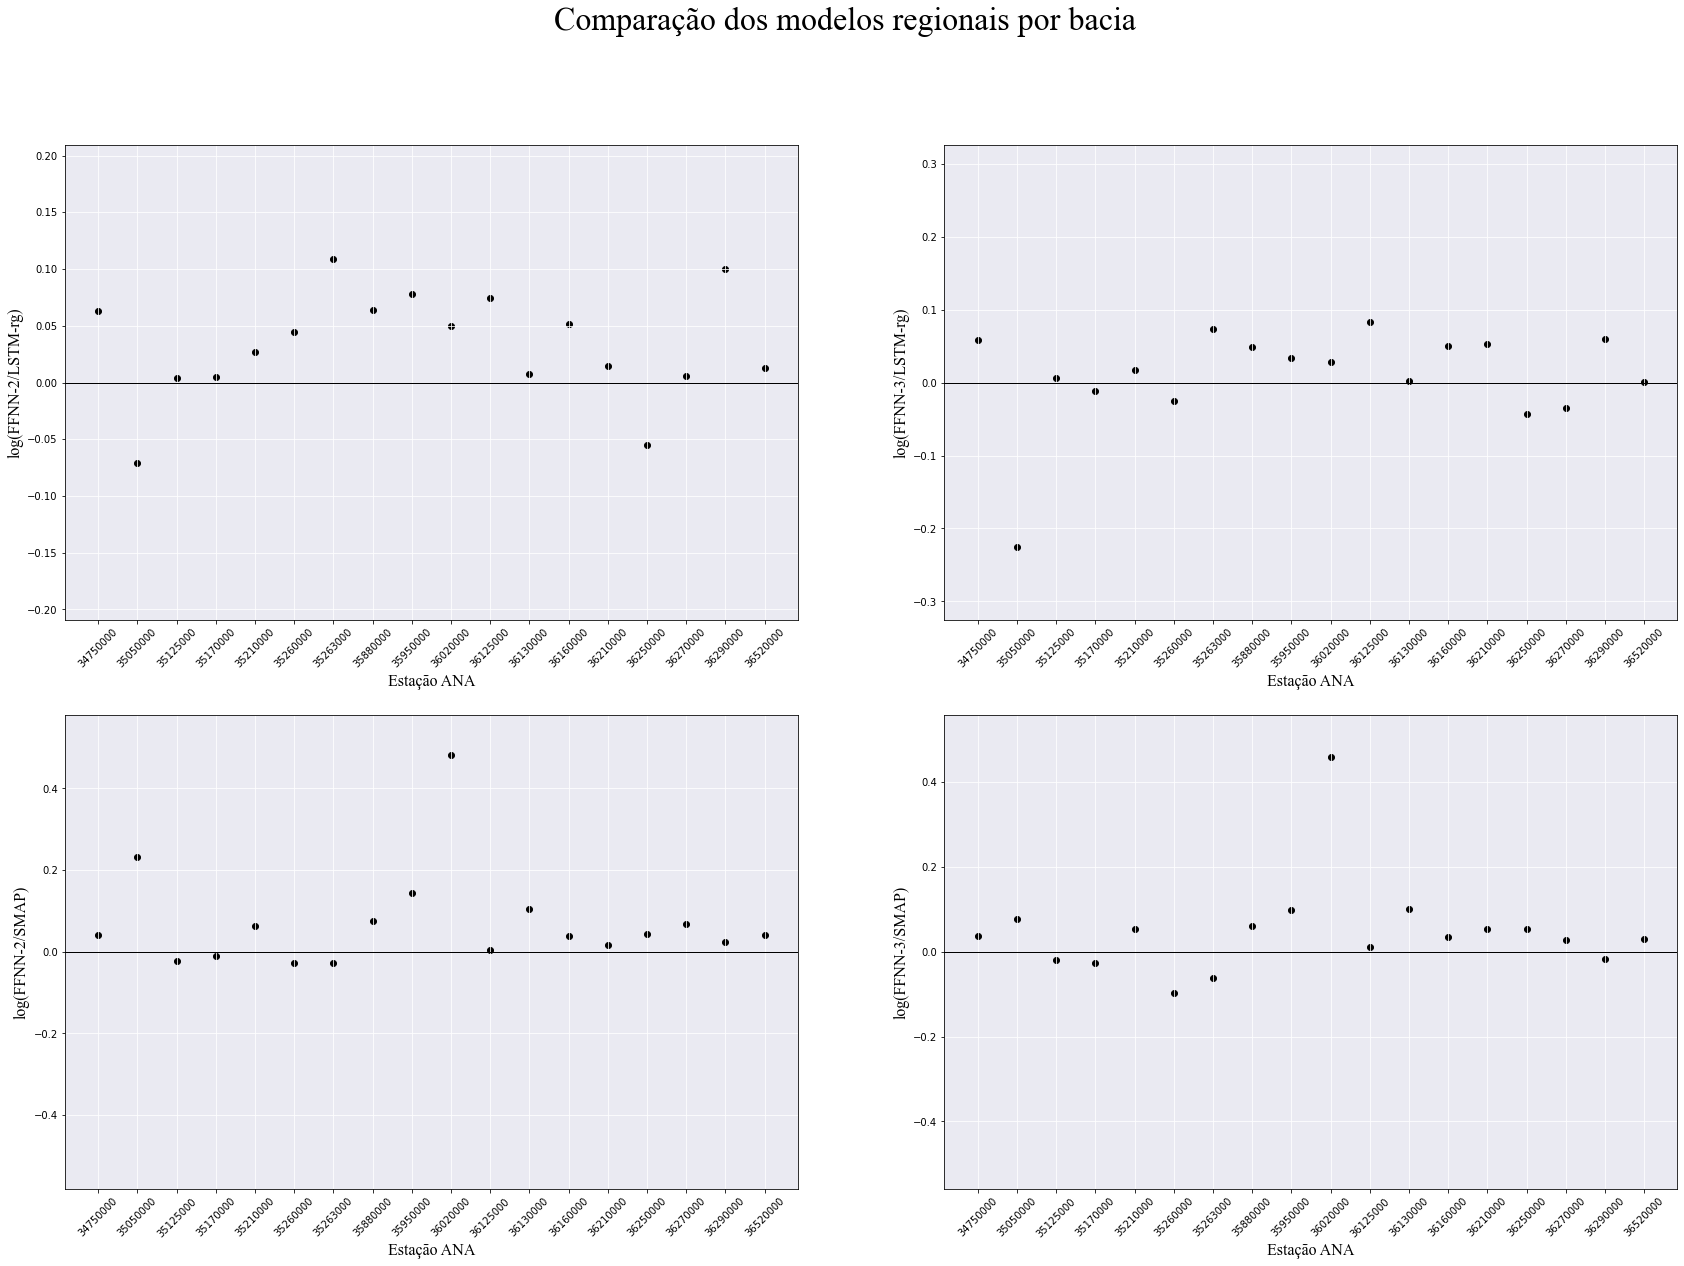

In [36]:
fig, axs = plt.subplots(2, 2,figsize=(28.9, 19.2))
#grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.5)
fig.suptitle('Comparação dos modelos regionais por bacia', fontsize=32,**tfont)
i,j = 0,0
for (id_down,id_up) in pairs[1:-1]:
    
    log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
    abs_ = max(abs(log_FFNN2_LSTMrg[~models_results.SMAP.isna()]))
    axs[j,i].scatter(caracFisicas[~models_results.SMAP.isna()].index.astype(str),log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
    axs[j,i].set_xlabel("Estação ANA", fontsize=16,**tfont)
    axs[j,i].set_ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]), fontsize=16,**tfont)
    #axs[j,i].set_xlim([0, 1])
    axs[j,i].set_ylim([-(abs_+0.1), abs_+0.1])
    axs[j,i].axhline(linewidth=1, color='#000')
    axs[j,i].grid(c='#fff')
    axs[j,i].set_facecolor('#eaeaf2')
    axs[j,i].tick_params(axis='x', labelrotation=45)
    
    i+=1
    if i == 2:
        i=0
        j+=1
fig.show()

In [37]:
fig.savefig('../database/output/images/regional_models_comparison.png')


In [38]:
carac_fis_en = {
    0 :"Declivity - D (%)",
    3:"Contribution area of the fluviometric station - A (km2)",
    5:"Total drainage length - CTD (km)",
    6:"Drainage density - DD (km-1)",
    7:"Soil water storage capacity (CAD) (mm)",
    8:"Average Curve Number– CN (mm)",
    9:"Basin compactness coefficient (Kc) - Kc",
    10:"Portion of the basin in the crystalline rock - Cr"

}
[1]

[1]

In [39]:
caracFisicas.columns[list(carac_fis_en.keys())]

Index(['Declividade - D (%)',
       'Área de contribuição da estação fluviométrica - A (km2)',
       'Comprimento total de drenagem - CTD (km)',
       'Densidade de drenagem - DD (km-1)',
       'Capacidade de armazenamento do solo CAD (mm)',
       'Curve number médio – CN (mm)', 'Índice de compacidade da bacia - Kc',
       'Parcela da bacia no cristalino - Cr'],
      dtype='object')

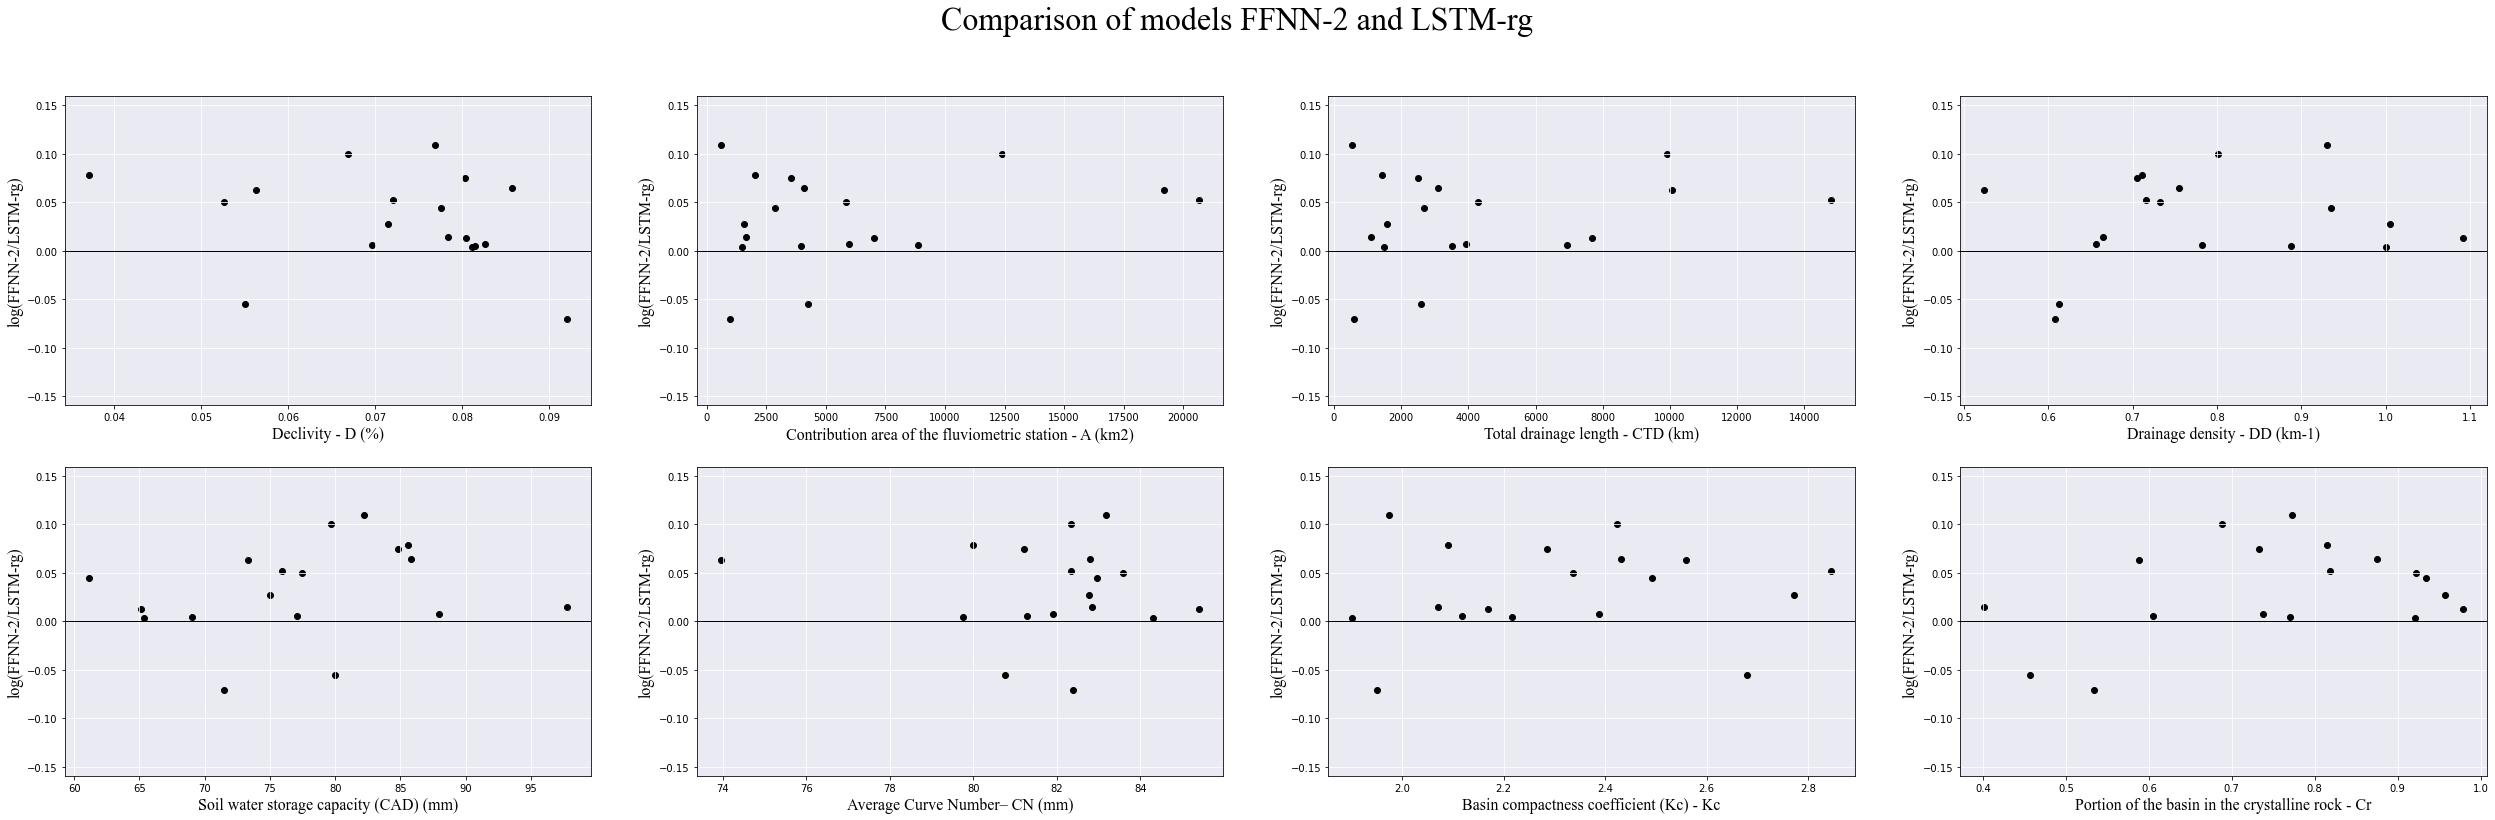

In [40]:
fig, axs = plt.subplots(2, 4,figsize=(43.4, 12.5))
#grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.5)
fig.suptitle('Comparison of models FFNN-2 and LSTM-rg', fontsize=32,**tfont)
i,j = 0,0
log_FFNN2_LSTMrg = log_nash(models_results[models_labels[3]],models_results[models_labels[1]])
abs_ = max(abs(log_FFNN2_LSTMrg[~models_results.SMAP.isna()]))
for k in list(carac_fis_en.keys()):
    axs[j,i].scatter(caracFisicas[~models_results.SMAP.isna()][caracFisicas.columns[k]],log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
    axs[j,i].set_xlabel(f"{carac_fis_en[k]}", fontsize=16,**tfont)
    axs[j,i].set_ylabel("log(%s/%s)"% (models_labels[1],models_labels[3]), fontsize=16,**tfont)
    #axs[j,i].set_xlim([0, 1])
    #axs[j,i].set_ylim([0, 1])
    axs[j,i].set_ylim([-(abs_+0.05), abs_+0.05])
    axs[j,i].axhline(linewidth=1, color='#000')
    axs[j,i].grid(c='#fff')
    axs[j,i].set_facecolor('#eaeaf2')
    #axs[j,i].patch.set_alpha(0.8)
    
    i+=1
    if i == 4:
        i=0
        j+=1
fig.show()

In [41]:
fig.savefig('../database/output/images/log_%s_%s_por_carac_bacia.png'%(models_labels[1],models_labels[3]))

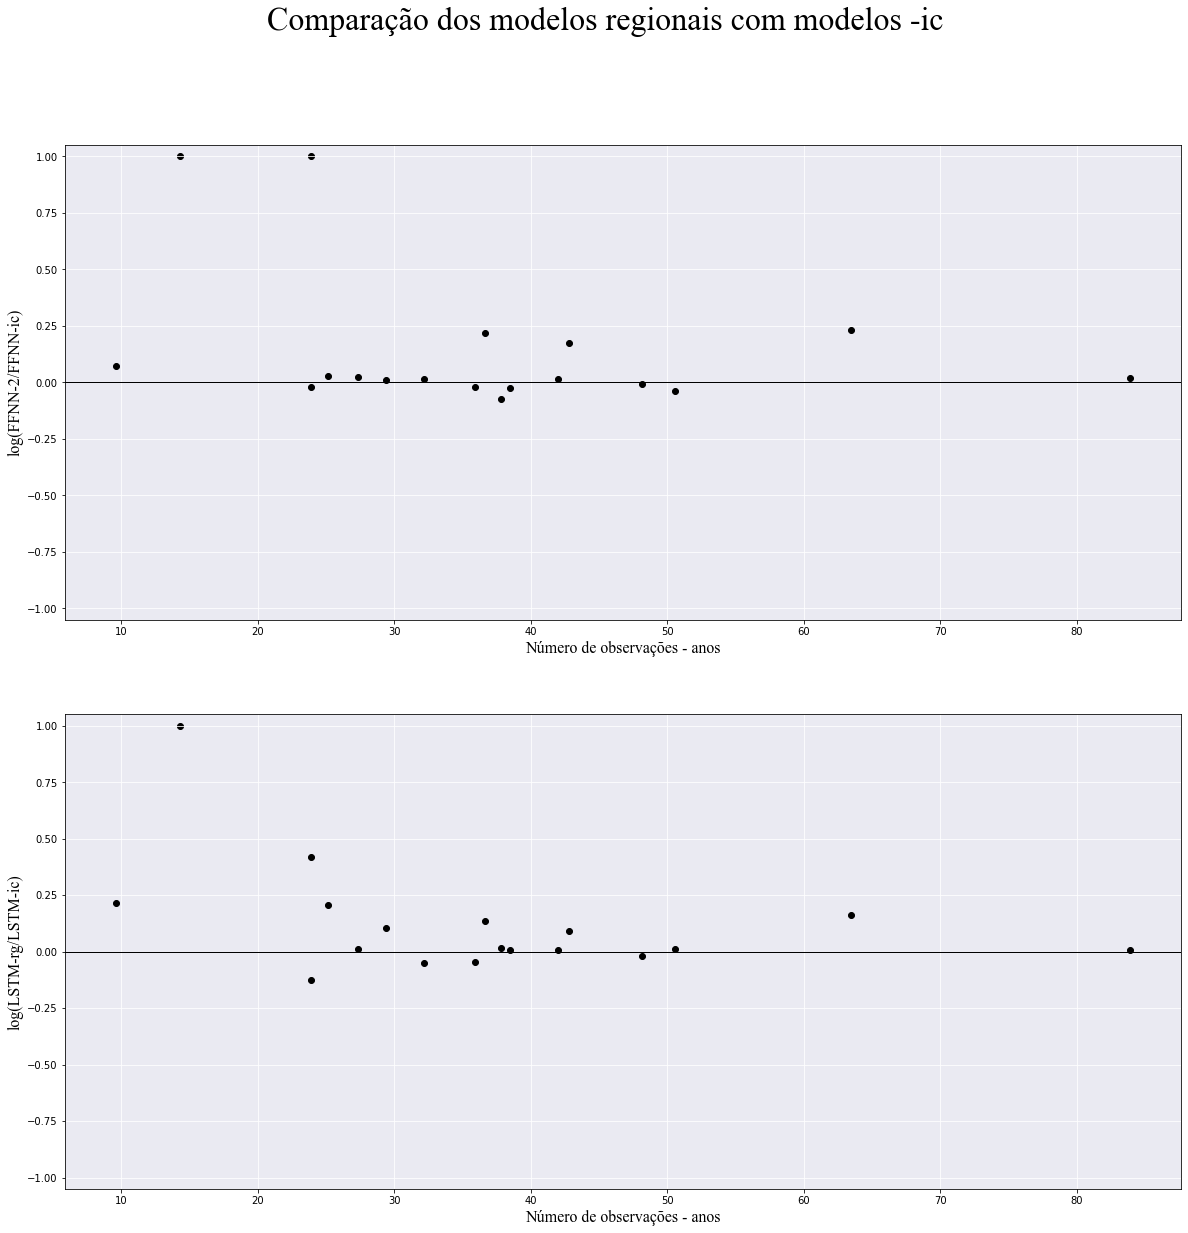

In [42]:
fig, axs = plt.subplots(2, 1,figsize=(20,19.2))
#grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.5)
fig.suptitle('Comparação dos modelos regionais com modelos -ic', fontsize=32,**tfont)


i,j = 1,0

pairs = [(-1,1),(-2,3)]
for (id_down,id_up) in pairs:
    log_FFNN2_LSTMrg = log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])
    abs_ = max(abs(log_FFNN2_LSTMrg[~models_results.SMAP.isna()]))
    axs[j].scatter(results_and_acf["n_obs"][~models_results.SMAP.isna()]/12,log_FFNN2_LSTMrg[~models_results.SMAP.isna()],facecolor='#000')
    
    axs[j].set_xlabel("Número de observações - anos",fontsize=16,**tfont)
    axs[j].set_ylabel("log(%s/%s)"% (models_labels[id_up],models_labels[id_down]),fontsize=16,**tfont)
    #axs[j].set_xlim([0, 1])
    #axs[j].set_ylim([0, 1])
    axs[j].set_ylim([-(abs_+0.05), abs_+0.05])
    axs[j].axhline(linewidth=1, color='#000')
    axs[j].grid(c='#fff')
    axs[j].set_facecolor('#eaeaf2')
    #axs[j].patch.set_alpha(0.8)
    
    j+=1

fig.savefig('../database/output/images/regional_and_ic_models.png')
fig.show()





In [43]:
results_and_acf[~models_results.SMAP.isna()]["n_obs"].index==log_FFNN2_LSTMrg[~models_results.SMAP.isna()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
models_labels_id

{0: 'FFNN-1',
 1: 'FFNN-2',
 2: 'FFNN-3',
 3: 'LSTM-rg',
 4: 'SMAP',
 5: 'LSTM-ic',
 6: 'FFNN-ic'}

In [45]:
id_down = 5
id_up = 3
log_nash(models_results[models_labels[id_down]],models_results[models_labels[id_up]])

Basin
34730000   -1.000000
34740000    0.255481
34750000    0.091306
35050000    0.213075
35125000    0.011624
35170000    0.009080
35210000   -0.018569
35223000    1.547159
35240000    0.218603
35260000    0.008457
35263000   -0.125943
35668000   -1.000000
35880000    0.418771
35950000   -0.049961
36020000    0.161020
36125000    0.136677
36130000    0.204903
36160000    0.006108
36210000   -0.044348
36220000   -1.000000
36250000    0.014076
36270000    1.000000
36290000    0.010739
36470000   -0.190460
36520000    0.105920
dtype: float64